In [1]:
import time
import requests
import pandas as pd
from bs4 import BeautifulSoup
from random import randint
from time import sleep
from joblib import dump, load
import joblib
import os
import glob
import pandas as pd
import requests
from bs4 import BeautifulSoup
from tabulate import tabulate
import json
from time import sleep
from random import randint
import time
# Custom Functions
from Weight_Map import map_categories
from EP_funs import time_to_minutes, compare_columns, Raw_Data_Filter, data_collector, convert_to_float
# Adjust below to fit the date of the run
rd = '072925' 
patha = r'/home/robs/Downloads/Upcoming_Events' # Projection Saved Places
pathb = r'MBIDK_MMA' # Models

In [2]:
# Upcoming event info scraped
###########
# This script will return the following items for the upcoming event on the the fightmetric website:
#    - Event Title  (String)
#    - Event Date   (String)
#    - Event Location   (String)
#    - Fighter list A   (List of strings)
#    - Fighter list B   (List of strings)
# 44 mins to write this with old code and internet help
# > than a min runtime
#######
# Fetch initial event page
url = 'http://www.ufcstats.com/statistics/events/completed?page=1'
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")
Event_urls = []
# Collect event URLs
for a in soup.find_all('a', href=True):
    Event_urls.append(a['href'])
# Filter event URLs of interest This Grabs the first event on the webpage aka the upcoming event; whereas 6:7 will grab the last 
# event that occured.
Upcoming_Event = Event_urls[5:6] 
Upcoming_Event
for UE in Upcoming_Event:
    response = requests.get(UE)
    soup_event = BeautifulSoup(response.content ,"html.parser")
Event_Title_upcoming=soup_event.find('span', attrs={"b-content__title-highlight"}).text.strip()
Event_Date=soup_event.find('i', attrs={"b-list__box-item-title"}).next.next.strip()
Event_Location=soup_event.find('i', attrs={"b-list__box-item-title"}).next.next.next.next.next.next.next.next.strip()
print(Event_Title_upcoming, Event_Date, Event_Location)
#
UE_FighterNames = soup_event.find_all("a", attrs={"b-link b-link_style_black"})
Fighter_Names = []
for name in UE_FighterNames:
    test = name.text.strip()
    if test == 'View':
        pass
    elif test == "View Matchup":
        pass
    else:
        Fighter_Names.append(test)
Fighter_A=Fighter_Names[::2]
Fighter_B=Fighter_Names[1::2]
print(Fighter_A, Fighter_B)
data = {
    "Name_A": Fighter_A,
    "Name_B": Fighter_B,
    "Date": Event_Date,
    "Location": Event_Location,
    "Title": Event_Title_upcoming
}
# Convert the dictionary into a pandas DataFrame
UCI = pd.DataFrame(data)
UCI['Date'] = pd.to_datetime(UCI['Date']) 
UCI['Name_A'] = UCI['Name_A'].str.strip()
UCI['Name_B'] = UCI['Name_B'].str.strip()

UFC Fight Night: Taira vs. Park August 02, 2025 Las Vegas, Nevada, USA
['Tatsuro Taira', 'Mateusz Rebecki', 'Elves Brener', 'Karol Rosa', 'Neil Magny', 'Danny Silva', 'Rinya Nakamura', 'Rodolfo Vieira', 'Nick Klein', 'Austin Bashi', 'Rafael Estevam', 'Piera Rodriguez'] ['HyunSung Park', 'Chris Duncan', 'Esteban Ribovics', 'Nora Cornolle', 'Elizeu Zaleski dos Santos', 'Kevin Vallejos', 'Nathan Fletcher', 'Tresean Gore', 'Andrey Pulyaev', 'John Yannis', 'Felipe Bunes', 'Ketlen Souza']


In [3]:
#Previous Event Data Collected and Added to main DF
# Event Dict
Event_title = []
Date = []
Location = []

#Fight Dict
Name_A = []
Outcome_A = [] # New Line
Sig_Strike_A = []
Sig_Strike_Percentage_A = []
Total_Strikes_Landed_A = []
Takedowns_A = []
Takedown_Acc_A = []
Subs_A = []
Reversal_A = []
Control_A = []
Name_B = []
Sig_Strike_B = []
Sig_Strike_Percentage_B = []
Total_Strikes_Landed_B = []
Takedowns_B = []
Takedown_Acc_B = []
Subs_B = []
Reversal_B = []
Control_B = []
event_Title = []
weight = []
method = []
round_Stopage = []
time_Stopage = []
max_Rounds = []
referee = []
judgeA = []
judgeA_Score = []
judgeB = []
judgeB_Score = []
judgeC = []
judgeC_Score = []

# Fighter Dict
Name_AA = []
Height_AA = []
Weight_AA = []
Reach_AA = []
Stance_AA = []
DOB_AA = []
Current_Record_AA = []
start = time.time()
Event_urls = []
Fight_urls = []
Fighter_urls = []
url = 'http://www.ufcstats.com/statistics/events/completed?page=1'
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

for a in soup.find_all('a', href=True):  # This for Loop grabs all the event links on the event page
    Event_urls.append(a['href'])
t=Event_urls[6:7] # This is the one for the past event that just occured, pulls the actual values from the predictions just occured

for url in t: #This places each event into the url to allow for scrapping of each event on a page
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    Event_title1=soup.select_one('.b-content__title-highlight').next.strip()
    Event_title.append(Event_title1)
    Date_Occured=soup.select_one('.b-list__box-list').next.next.next.next.next.next.strip()
    Date.append(Date_Occured)
    Location1=soup.select_one('.b-list__box-list').next.next.next.next.next.next.next.next.next.next.next.next.strip()
    Location.append(Location1)
    sleep(randint(5,10))
for urltt in t:          
    response = requests.get(urltt)
    soup = BeautifulSoup(response.content, "lxml")
    P=soup.find_all("a", {'class':"b-flag b-flag_style_green"})
    sleep(randint(5,10))
    for i in P:
        Fight_urls.append(i['href'])
for urlF in Fight_urls: #Uses each fight detail url to grab needed information
    respone = requests.get(urlF)
    soup = BeautifulSoup(respone.content, 'html.parser')
    Fighter_A=soup.select_one('td.b-fight-details__table-col').next.next.next.next.next
    Name_A.append(Fighter_A)
    Outcome_for_A=soup.find(class_="b-fight-details__person-status b-fight-details__person-status_style_gray").text.strip()
    Outcome_A.append(Outcome_for_A)
    Fighter_B=soup.select_one('td.b-fight-details__table-col').next.next.next.next.next.next.next.next.next.next.next
    Name_B.append(Fighter_B)
    Event_Title=soup.select_one('.b-content__title').text.strip()
    event_Title.append(Event_Title)
    Weight=soup.select_one('.b-fight-details__fight-title').text.strip()
    weight.append(Weight)
    Method=soup.select_one('i.b-fight-details__text-item_first').text.strip().split()[1]
    method.append(Method)
    Round_Stopage=soup.select_one('.b-fight-details__text-item').text.strip().split()[1]
    round_Stopage.append(Round_Stopage)
    Time_Stopage=soup.select_one('.b-fight-details__text-item').next.next.next.next.next.next.text.strip().split()[1]
    time_Stopage.append(Time_Stopage)
    Max_Rounds=soup.select_one('.b-fight-details__text-item').next.next.next.next.next.next.next.next.next.next.next.next.text.strip().split()[2:4]
    max_Rounds.append(Max_Rounds)
    Referee=soup.select_one('.b-fight-details__text-item').next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.text.strip()
    referee.append(Referee)
    Significant_Strikes_A=soup.select_one('.b-fight-details__table-text').next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.text.strip().split()[0]
    Sig_Strike_A.append(Significant_Strikes_A)
    Significant_Strikes_B=soup.select_one('.b-fight-details__table-text').next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.text.strip().split()[0]
    Sig_Strike_B.append(Significant_Strikes_B)
    Significant_Strike_Percentage_A=soup.select_one('.b-fight-details__table-text').next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.text.strip().split()[0]
    Sig_Strike_Percentage_A.append(Significant_Strike_Percentage_A)
    Significant_Strike_Percentage_B=soup.select_one('.b-fight-details__table-text').next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.text.strip().split()[1]
    Sig_Strike_Percentage_B.append(Significant_Strike_Percentage_B)
    Total_Strikes_Landed_AA=soup.select_one('.b-fight-details__table-text').next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.text.strip().split()[0]
    Total_Strikes_Landed_A.append(Total_Strikes_Landed_AA)
    Total_Strikes_Landed_BB=soup.select_one('.b-fight-details__table-text').next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.text.strip().split()[3]
    Total_Strikes_Landed_B.append(Total_Strikes_Landed_BB)
    Takedowns_AA=soup.select_one('.b-fight-details__table-text').next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.text.strip().split()[0:3]
    Takedowns_A.append(Takedowns_AA)
    Takedowns_BB=soup.select_one('.b-fight-details__table-text').next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.text.strip().split()[3:6]
    Takedowns_B.append(Takedowns_BB)
    Takedown_Acc_AA=soup.select_one('.b-fight-details__table-text').next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.text.strip().split()[0]
    Takedown_Acc_A.append(Takedown_Acc_AA)
    Takedown_Acc_BB=soup.select_one('.b-fight-details__table-text').next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.text.strip().split()[1]
    Takedown_Acc_B.append(Takedown_Acc_BB)
    Sub_Attempts_A=soup.select_one('.b-fight-details__table-text').next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.text.strip().split()[0]
    Subs_A.append(Sub_Attempts_A)
    Sub_Attempts_B=soup.select_one('.b-fight-details__table-text').next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.text.strip().split()[1]
    Subs_B.append(Sub_Attempts_B)
    Reversal_AA=soup.select_one('.b-fight-details__table-text').next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.text.strip().split()[0]
    Reversal_A.append((Reversal_AA))
    Reversal_BB=soup.select_one('.b-fight-details__table-text').next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.text.strip().split()[1]
    Reversal_B.append(Reversal_BB)
    Control_AA=soup.select_one('.b-fight-details__table-text').next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.text.strip().split()[0]
    Control_A.append(Control_AA)
    Control_BB=soup.select_one('.b-fight-details__table-text').next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.text.strip().split()[1]
    Control_B.append(Control_BB)
    sleep(randint(2,7))
end = time.time()
print(end - start)


#Grabs winner
start = time.time()
Event_urls = []
fighters_list= []
url = 'http://www.ufcstats.com/statistics/events/completed?page=1'

response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

for a in soup.find_all('a', href=True):  # This for Loop grabs all the event links on the event page
    Event_urls.append(a['href'])
# t=Event_urls[5:6] # Puts all the event links of interes
# t=Event_urls[6:30]
t=Event_urls[6:7]
for url in t: #This places each event into the url to allow for scrapping of each event on a page
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    p=soup.find_all('a',  {'class':"b-link b-link_style_black"})
    for i in p:
        TT=i.text.strip()
        fighters_list.append(TT)

    sleep(randint(2,5))
    
Winners = fighters_list[::2]



Winner_DF = pd.DataFrame({

    'Winners' : Winners
})
Winner_DF

Events = pd.DataFrame({
    'Event_Title': Event_title,
    'Date' : Date,
    'Location': Location
})
Events
# Fight DF
fights = pd.DataFrame({
    "Outcome_A": Outcome_A,
    'Name_A' : Name_A,
    'Sig_Strike_A': Sig_Strike_A,
    'Sig_Strike_Percentage_A' : Sig_Strike_Percentage_A,
    'Total_Strikes_Landed_A': Total_Strikes_Landed_A,
    'Takedowns_A' : Takedowns_A,
    'Takedown_Acc_A' : Takedown_Acc_A,
    'Subs_A' : Subs_A,
    'Reversal_A': Reversal_A,
    'Control_A' : Control_A,
    'Name_B' : Name_B,
    'Sig_Strike_B' : Sig_Strike_B,
    'Sig_Strike_Percentage_B' : Sig_Strike_Percentage_B,
    'Total_Strikes_Landed_B' : Total_Strikes_Landed_B,
    'Takedowns_B' : Takedowns_B,
    'Takedown_Acc_B' : Takedown_Acc_B,
    'Subs_B' : Subs_B,
    'Reversal_B' : Reversal_B,
    'Control_B' : Control_B,
    'event_Title': event_Title,
    'weight' : weight,
    'method' : method,
    'round_Stopage': round_Stopage,
    'time_Stopage': time_Stopage,
    'max_Rounds' : max_Rounds,
    'referee' : referee,
})
Fights_With_Details=pd.merge(left=fights, right=Events, left_on="event_Title", right_on = "Event_Title")
Fights_With_Details['Outcome_A'] = Winner_DF['Winners']
Fights_With_Details

Full_df_old = pd.read_excel("/home/robs/Full_Raw_Data_Updated_072925.xlsx")
Full_df_old
df_list = [Full_df_old, Fights_With_Details]
Updated_main_db = pd.concat(df_list)
Updated_main_db

82.72969818115234


,Outcome_A,Name_A,Sig_Strike_A,Sig_Strike_Percentage_A,Total_Strikes_Landed_A,Takedowns_A,Takedown_Acc_A,Subs_A,Reversal_A,Control_A,...,event_Title,weight,method,round_Stopage,time_Stopage,max_Rounds,referee,Event_Title,Date,Location
0,Henry Cejudo,Henry Cejudo,90,52%,99,"['1', 'of', '4']",25%,1,0,2:40,...,UFC 238: Cejudo vs. Moraes,UFC Bantamweight Title Bout,KO/TKO,3,4:51,"['5', 'Rnd']",Marc Goddard,UFC 238: Cejudo vs. Moraes,2019-06-08 00:00:00,"Chicago, Illinois, USA"
1,Valentina Shevchenko,Valentina Shevchenko,8,72%,37,"['2', 'of', '2']",100%,1,0,4:16,...,UFC 238: Cejudo vs. Moraes,UFC Women's Flyweight Title Bout,KO/TKO,2,0:26,"['5', 'Rnd']",Robert Madrigal,UFC 238: Cejudo vs. Moraes,2019-06-08 00:00:00,"Chicago, Illinois, USA"
2,Tony Ferguson,Tony Ferguson,104,52%,104,"['0', 'of', '0']",---,0,0,0:00,...,UFC 238: Cejudo vs. Moraes,Lightweight Bout,TKO,2,5:00,"['3', 'Rnd']",Dan Miragliotta,UFC 238: Cejudo vs. Moraes,2019-06-08 00:00:00,"Chicago, Illinois, USA"
3,Petr Yan,Jimmie Rivera,73,38%,76,"['0', 'of', '3']",0%,0,0,0:39,...,UFC 238: Cejudo vs. Moraes,Bantamweight Bout,Decision,3,5:00,"['3', 'Rnd']",Kevin MacDonald,UFC 238: Cejudo vs. Moraes,2019-06-08 00:00:00,"Chicago, Illinois, USA"
4,Blagoy Ivanov,Tai Tuivasa,64,44%,66,"['0', 'of', '0']",---,0,0,2:39,...,UFC 238: Cejudo vs. Moraes,Heavyweight Bout,Decision,3,5:00,"['3', 'Rnd']",Dan Miragliotta,UFC 238: Cejudo vs. Moraes,2019-06-08 00:00:00,"Chicago, Illinois, USA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,Davey Grant,Davey Grant,66,50%,66,"[0, of, 0]",---,0,0,0:19,...,UFC Fight Night: Whittaker vs. De Ridder,Bantamweight Bout,Decision,3,5:00,"[3, Rnd]",Jason Herzog,UFC Fight Night: Whittaker vs. De Ridder,"July 26, 2025","Abu Dhabi, Abu Dhabi, United Arab Emirates"
8,Tabatha Ricci,Amanda Ribas,30,41%,77,"[1, of, 3]",33%,0,0,0:18,...,UFC Fight Night: Whittaker vs. De Ridder,Women's Strawweight Bout,KO/TKO,2,2:59,"[3, Rnd]",Daniel Movahedi,UFC Fight Night: Whittaker vs. De Ridder,"July 26, 2025","Abu Dhabi, Abu Dhabi, United Arab Emirates"
9,Billy Elekana,Ibo Aslan,28,35%,29,"[0, of, 0]",---,0,0,0:00,...,UFC Fight Night: Whittaker vs. De Ridder,Light Heavyweight Bout,Decision,3,5:00,"[3, Rnd]",Jim Perdios,UFC Fight Night: Whittaker vs. De Ridder,"July 26, 2025","Abu Dhabi, Abu Dhabi, United Arab Emirates"
10,Steven Nguyen,Mohammad Yahya,57,37%,60,"[0, of, 4]",0%,0,0,0:05,...,UFC Fight Night: Whittaker vs. De Ridder,Featherweight Bout,KO/TKO,2,5:00,"[3, Rnd]",Jason Herzog,UFC Fight Night: Whittaker vs. De Ridder,"July 26, 2025","Abu Dhabi, Abu Dhabi, United Arab Emirates"


In [4]:
# Load and transform data
# Full_df = pd.read_excel("/home/robs/Full_Raw_Data.xlsx")
Full_df = Updated_main_db
Full_df['Date'] = pd.to_datetime(Full_df['Date']) 
Full_df['Outcome_A'] = Full_df['Outcome_A'].str.strip()
Full_df['Name_A'] = Full_df['Name_A'].str.strip()
Full_df['Name_B'] = Full_df['Name_B'].str.strip()
# Extract takedown data
Full_df['Takedowns_Fighter_A'] = pd.to_numeric(
    Full_df['Takedowns_A'].str.strip("[]").str.split(",").str[0].str.strip(" '"))
Full_df['Takedowns_Attempts_A'] = pd.to_numeric(
    Full_df['Takedowns_A'].str.strip("[]").str.split(",").str[2].str.strip(" '"))
Full_df['Takedowns_Fighter_B'] = pd.to_numeric(
    Full_df['Takedowns_B'].str.strip("[]").str.split(",").str[0].str.strip(" '"))
Full_df['Takedowns_Attempts_B'] = pd.to_numeric(
    Full_df['Takedowns_B'].str.strip("[]").str.split(",").str[2].str.strip(" '"))
# Convert percentages to floats
def percent_to_float(x, default_val):
    if isinstance(x, str) and '%' in x:
        return float(x.strip('%')) / 100
    elif x == '---':
        return default_val
    return x
Full_df['Sig_Strike_Percentage_A'] = Full_df['Sig_Strike_Percentage_A'].apply(lambda x: percent_to_float(x, -1)).astype(float)
Full_df['Sig_Strike_Percentage_B'] = Full_df['Sig_Strike_Percentage_B'].apply(lambda x: percent_to_float(x, -1)).astype(float)
Full_df['Takedown_Acc_A'] = Full_df['Takedown_Acc_A'].apply(lambda x: percent_to_float(x, -1)).astype(float)
Full_df['Takedown_Acc_B'] = Full_df['Takedown_Acc_B'].apply(lambda x: percent_to_float(x, -1)).astype(float)
# Loop through different sample sizes, these values are determined by comparing these Projections against actual performance, this is 
# is one of the areas that can be improved
samplesize_list = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for dis_n in samplesize_list:
    good = 0
    bad = 0
    # Data containers
    Name_A = []
    Name_B = []
    Date_of_Event = []
    Sig_Strikes_A = []
    Sig_Strikes_B = []
    Sig_Strikes_Acc_A = []
    Sig_Strikes_Acc_B = []
    Tot_Strikes_A = []
    Tot_Strikes_B = []
    Takedown_Acc_A = []
    Takedown_Acc_B = []
    Subs_A = []
    Subs_B = []
    Reversal_A = []
    Reversal_B = []
    Takedowns_Attempt_A = []
    Takedowns_Attempt_B = []
    # Iterate over fighter pairs
    for Name_A_zip, Name_B_zip, Date_zip in zip(UCI['Name_A'], UCI['Name_B'], UCI['Date']):
        try:
            X_A = Raw_Data_Filter(Name_A_zip, dis_n, Date_zip, Full_df)
            X_B = Raw_Data_Filter(Name_B_zip, dis_n, Date_zip, Full_df)
            if len(X_A) >= dis_n and len(X_B) >= dis_n:
                Fighter_A_Averages = data_collector(Name_A_zip, X_A)
                Fighter_B_Averages = data_collector(Name_B_zip, X_B)
                Name_A.append(Name_A_zip)
                Name_B.append(Name_B_zip)
                Date_of_Event.append(Date_zip)
                Sig_Strikes_A.append(Fighter_A_Averages.iloc[0])
                Sig_Strikes_B.append(Fighter_B_Averages.iloc[0])
                Sig_Strikes_Acc_A.append(Fighter_A_Averages.iloc[1])
                Sig_Strikes_Acc_B.append(Fighter_B_Averages.iloc[1])
                Tot_Strikes_A.append(Fighter_A_Averages.iloc[2])
                Tot_Strikes_B.append(Fighter_B_Averages.iloc[2])
                Takedown_Acc_A.append(Fighter_A_Averages.iloc[3])
                Takedown_Acc_B.append(Fighter_B_Averages.iloc[3])
                Subs_A.append(Fighter_A_Averages.iloc[4])
                Subs_B.append(Fighter_B_Averages.iloc[4])
                Reversal_A.append(Fighter_A_Averages.iloc[5])
                Reversal_B.append(Fighter_B_Averages.iloc[5])
                Takedowns_Attempt_A.append(Fighter_A_Averages.iloc[6])
                Takedowns_Attempt_B.append(Fighter_B_Averages.iloc[6])
                good += 1
        except Exception as e:
            print(f"Error processing {Name_A_zip} vs {Name_B_zip} on {Date_zip}: {e}")
            bad += 1
    # Compile results into DataFrame
    data = {
        "Name_A": Name_A,
        "Name_B": Name_B,
        "Event_Date": Date_of_Event,
        "Sig_Strikes_A": Sig_Strikes_A,
        "Sig_Strikes_B": Sig_Strikes_B,
        "Sig_Strikes_Acc_A": Sig_Strikes_Acc_A,
        "Sig_Strikes_Acc_B": Sig_Strikes_Acc_B,
        "Tot_Strikes_A": Tot_Strikes_A,
        "Tot_Strikes_B": Tot_Strikes_B,
        "Takedown_Acc_A": Takedown_Acc_A,
        "Takedown_Acc_B": Takedown_Acc_B,
        "Subs_A": Subs_A,
        "Subs_B": Subs_B,
        "Reversal_A": Reversal_A,
        "Reversal_B": Reversal_B,
        "Takedown_Attempts_A": Takedowns_Attempt_A,
        "Takedowns_Attempts_B": Takedowns_Attempt_B
    }
    df_test = pd.DataFrame(data)
    # Optional: Export to Excel
    output_path = f"/home/robs/Downloads/Upcoming_Events/{rd}_{dis_n}_SampleSize_Upcoming_Event.xlsx"
    df_test.to_excel(output_path, index=False)
    print(f"Saved: {output_path} | Good: {good}, Bad: {bad}")


Error processing Danny Silva vs Kevin Vallejos on 2025-08-02 00:00:00: object of type 'NoneType' has no len()
Error processing Nick Klein vs Andrey Pulyaev on 2025-08-02 00:00:00: object of type 'NoneType' has no len()
Error processing Austin Bashi vs John Yannis on 2025-08-02 00:00:00: object of type 'NoneType' has no len()
Saved: /home/robs/Downloads/Upcoming_Events/072925_2_SampleSize_Upcoming_Event.xlsx | Good: 9, Bad: 3
Error processing Danny Silva vs Kevin Vallejos on 2025-08-02 00:00:00: object of type 'NoneType' has no len()
Error processing Nick Klein vs Andrey Pulyaev on 2025-08-02 00:00:00: object of type 'NoneType' has no len()
Error processing Austin Bashi vs John Yannis on 2025-08-02 00:00:00: object of type 'NoneType' has no len()
Saved: /home/robs/Downloads/Upcoming_Events/072925_3_SampleSize_Upcoming_Event.xlsx | Good: 9, Bad: 3
Error processing Tatsuro Taira vs HyunSung Park on 2025-08-02 00:00:00: object of type 'NoneType' has no len()
Error processing Danny Silva vs

In [5]:
import pandas as pd
import os
import glob
import joblib
from collections import Counter
# Convert the Projection Columns into the same format that the models were trained with, this should be done eariler in the process
# or even just keeping the naming consistent throughout, improvment area.
column_mapping = {
    'Sig_Strikes_A': 'Sig_Strike_A',
    'Sig_Strikes_Acc_A': 'Sig_Strike_Percentage_A',
    'Tot_Strikes_A': 'Total_Strikes_Landed_A',
    'Sig_Strikes_B': 'Sig_Strike_B',
    'Sig_Strikes_Acc_B': 'Sig_Strike_Percentage_B',
    'Tot_Strikes_B': 'Total_Strikes_Landed_B'
}
# Load files and models
all_files = glob.glob(os.path.join(patha, "*.xlsx"))
models_list = {
    filename: joblib.load(os.path.join(pathb, filename))
    for filename in os.listdir(pathb) if filename.endswith('.sav')
}
# Result Storage
all_predictions = []
# Gather Projections from each file
for file in all_files:
    df = pd.read_excel(file)
    df = df.rename(columns=column_mapping)
    # Get names for applying the results easier, whats the point in predicting who wins what when you don't have the names lmao.
    names = df[['Name_A', 'Name_B']].copy()
    # Features to predict
    X = df[[
        'Sig_Strike_A',
        'Sig_Strike_Percentage_A',
        'Total_Strikes_Landed_A',
        'Sig_Strike_B',
        'Sig_Strike_Percentage_B',
        'Total_Strikes_Landed_B'
    ]]
    # Predict using all the models in the prod envi
    for model_name, model in models_list.items():
        preds = model.predict(X)
        pred_df = names.copy()
        pred_df['prediction'] = preds
        pred_df['model'] = model_name
        all_predictions.append(pred_df)
combined_df = pd.concat(all_predictions, ignore_index=True)
summary_df = combined_df.groupby(['Name_A', 'Name_B', 'prediction']).size().unstack(fill_value=0).reset_index()
summary_df = summary_df.rename(columns={0: 'A_Pred_Loses', 1: 'A_Pred_Win'})

In [6]:
def determine_predicted_winner_with_confidence(df):
    # Total predictions per row
    df['Total_Runs'] = df['A_Pred_Win'] + df['A_Pred_Loses']
    
    # Determine winner and confidence (lmao, not the correct term but it works)
    def get_winner_and_confidence(row):
        if row['A_Pred_Win'] > row['A_Pred_Loses']:
            return row['Name_A'], row['A_Pred_Win'] / row['Total_Runs']
        elif row['A_Pred_Loses'] > row['A_Pred_Win']:
            return row['Name_B'], row['A_Pred_Loses'] / row['Total_Runs']
        else:
            return 'Tie', 0.5  # Tie condition
    
    # Apply logic to dataframe
    results = df.apply(get_winner_and_confidence, axis=1)
    df['Predicted_Winner'] = results.apply(lambda x: x[0])
    df['Predicition_Agg_Confidence'] = results.apply(lambda x: round(x[1], 2))
    
    return df

# Apply the function to your summary dataframe
summary_df = determine_predicted_winner_with_confidence(summary_df)

# Save Predicted Names, 

summary_df['Predicted_Winner'].to_csv("/home/robs/MMA_Outcomes/Model_Predsthisrun.csv")

# Show relevant columns
summary_df[['Name_A', 'Name_B', 'A_Pred_Win', 'A_Pred_Loses', 'Total_Runs', 'Predicted_Winner', 'Predicition_Agg_Confidence']]


prediction,Name_A,Name_B,A_Pred_Win,A_Pred_Loses,Total_Runs,Predicted_Winner,Predicition_Agg_Confidence
0,Elves Brener,Esteban Ribovics,0,28,28,Esteban Ribovics,1.00
1,Karol Rosa,Nora Cornolle,21,0,21,Karol Rosa,1.00
2,Mateusz Rebecki,Chris Duncan,28,0,28,Mateusz Rebecki,1.00
3,Neil Magny,Elizeu Zaleski dos Santos,29,34,63,Elizeu Zaleski dos Santos,0.54
4,Piera Rodriguez,Ketlen Souza,15,20,35,Ketlen Souza,0.57
5,Rafael Estevam,Felipe Bunes,13,1,14,Rafael Estevam,0.93
6,Rinya Nakamura,Nathan Fletcher,5,9,14,Nathan Fletcher,0.64
7,Rodolfo Vieira,Tresean Gore,34,1,35,Rodolfo Vieira,0.97
8,Tatsuro Taira,HyunSung Park,13,1,14,Tatsuro Taira,0.93


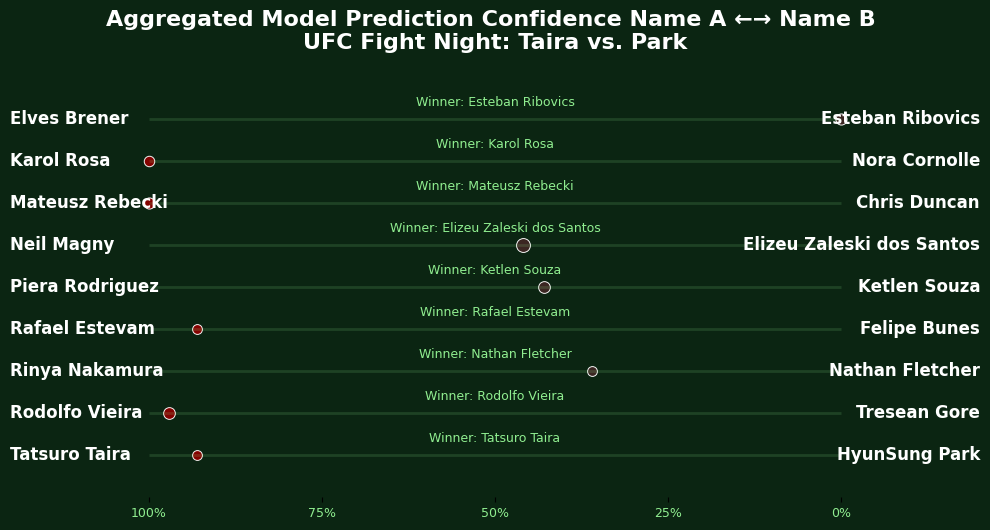

In [7]:
import matplotlib.pyplot as plt

# Reverse DataFrame so first entry appears at the top
summary_df1 = summary_df.iloc[::-1].reset_index(drop=True)

# Set up figure with forest background
fig, ax = plt.subplots(figsize=(10, 0.6 * len(summary_df1)))
fig.patch.set_facecolor('#0b2512')  # dark forest green background
ax.set_facecolor('#0b2512')

# Dot size scaling based on Total_Runs
min_size = 50
max_size = 100
min_runs = summary_df1['Total_Runs'].min()
max_runs = summary_df1['Total_Runs'].max()

def scale_size(runs):
    if max_runs == min_runs:
        return (min_size + max_size) / 2
    return min_size + (max_size - min_size) * ((runs - min_runs) / (max_runs - min_runs))

for i, row in summary_df1.iterrows():
    # Baseline line
    ax.hlines(y=i, xmin=0, xmax=1, color='lightgreen', alpha=0.15, linewidth=2)

    # Earth-tone color mapping for dots
    if row["Predicted_Winner"] == row["Name_A"]:
        color = '#8B0000'  # dark red for Name_A
        dot_position = row["Predicition_Agg_Confidence"]
    elif row["Predicted_Winner"] == row["Name_B"]:
        color = '#3E2723'  # dark brown for Name_B
        dot_position = 1 - row["Predicition_Agg_Confidence"]  # reversed confidence for Name_B
    else:
        color = '#8b8589'  # taupe/stone for ties
        dot_position = 0.5  # center for ties

    # Scale size for dots
    size = scale_size(row['Total_Runs'])

    # Plot the single dot for predicted winner (Name_A or Name_B)
    ax.scatter(dot_position, i, color=color, s=size,
               alpha=0.95, edgecolors='white', linewidths=0.7)

    # Fighter names — further pushed out for better readability
    ax.text(-0.2, i, row["Name_B"], va='center', ha='right',
            fontsize=12, fontweight='bold', color='white')  # Name_B pushed left
    ax.text(1.2, i, row["Name_A"], va='center', ha='left',
            fontsize=12, fontweight='bold', color='white')   # Name_A pushed right

    # Predicted winner label
    ax.text(0.5, i + 0.25, f"Winner: {row['Predicted_Winner']}",
            ha='center', va='bottom', fontsize=9,
            color='lightgreen', fontweight='medium')

# Axes formatting
ax.set_xlim(-0.2, 1.2)
ax.set_ylim(-1, len(summary_df1))
ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
ax.set_xticklabels(['0%', '25%', '50%', '75%', '100%'],
                   color='lightgreen', fontsize=9)
ax.set_yticks([])
ax.set_title(f"Aggregated Model Prediction Confidence Name A ←→ Name B \n{Event_Title_upcoming}",
             fontsize=16, color='white', pad=20, weight='bold')

# Invert x-axis (Name_A on left)
ax.invert_xaxis()

# Clean up: remove spines for a minimalistic look
for spine in ax.spines.values():
    spine.set_visible(False)
# Save the plot as a PNG file
plt.savefig(f'UpcomingEvent_{rd}_prediction_confidence_plot.png', format='png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


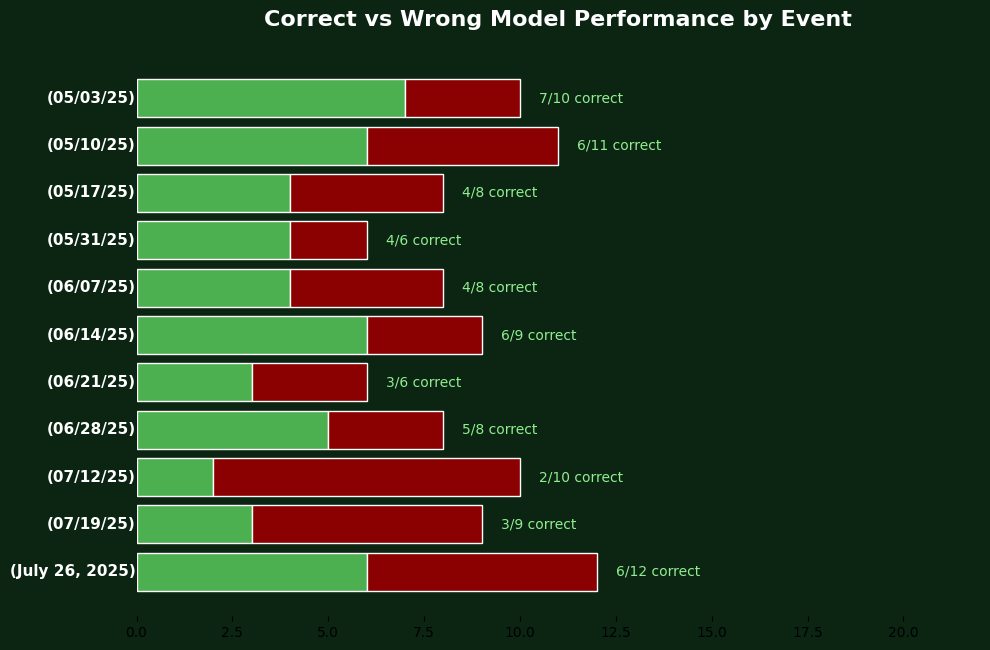

In [8]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# summary_df1=pd.read_csv("/home/robs/MMA_Outcomes/Model_Outcomes.csv")

# PredWinnerlastweek=pd.read_csv("/home/robs/MMA_Outcomes/Oldpredicted.csv") #Old predictions
# PredWinnerlastweek

# List_of_Winners = Winner_DF['Winners']
# List_of_Predictions = PredWinnerlastweek['Predicted_Winner']

# set(List_of_Winners).intersection(List_of_Predictions)


# Last_Week_Performance_Correct = len(set(List_of_Winners).intersection(List_of_Predictions))
# Last_Week_Performance_Total = len(List_of_Winners)
# Last_Week_Performance_Wrong = Last_Week_Performance_Total - Last_Week_Performance_Correct
# Last_Week_Performance_Accuracy = Last_Week_Performance_Correct / Last_Week_Performance_Total

# LWP_Metrics = pd.DataFrame({
#     'Event Title': Event_title,
#     'Event Date' : Date,
#     "Correct" : Last_Week_Performance_Correct,
#     "Wrong" : Last_Week_Performance_Wrong,
#     "Total" : Last_Week_Performance_Total,
#     "Acc" : Last_Week_Performance_Accuracy
    
# })
# LWP_Metrics


# summary_df1 = pd.concat([summary_df1, LWP_Metrics])


# summary_df1 = summary_df1.sort_values('Event Date', ascending=False).reset_index(drop=True)

# #Output New datafile 
# summary_df1.to_csv('/home/robs/MMA_Outcomes/Model_Outcomes_Updated.csv')

# fig, ax = plt.subplots(figsize=(10, 0.6 * len(summary_df1)))
# fig.patch.set_facecolor('#0b2512')
# ax.set_facecolor('#0b2512')

# # Plot each stacked bar
# for i, row in summary_df1.iterrows():
#     ax.barh(i, row['Correct'], color='#4CAF50', edgecolor='white')  # green for correct
#     ax.barh(i, row['Wrong'], left=row['Correct'], color='#8B0000', edgecolor='white')  # red for wrong

#     # Add text labels
#     ax.text(row['Total'] + 0.5, i, f"{row['Correct']}/{row['Total']} correct",
#             va='center', ha='left', color='lightgreen', fontsize=10)

#     ax.text(-0.02, i, f"({row['Event Date']})",
#             va='center', ha='right', fontsize=11, color='white', fontweight='bold')

# # Formatting
# ax.set_yticks([])
# ax.set_xlim(0, summary_df1['Total'].max() + 10)
# ax.set_title("Correct vs Wrong Model Performance by Event",
#              fontsize=16, color='white', pad=20, weight='bold')

# for spine in ax.spines.values():
#     spine.set_visible(False)

# plt.tight_layout()
# plt.savefig("correct_vs_wrong_predictions.png", format='png', dpi=300, bbox_inches='tight')
# plt.show()